<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-20-Supervised-Learning-for-Fraud-Detection-Lab/blob/main/Chapter_20_Final_Lab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Insurance Claims Fraud Detection Lab**

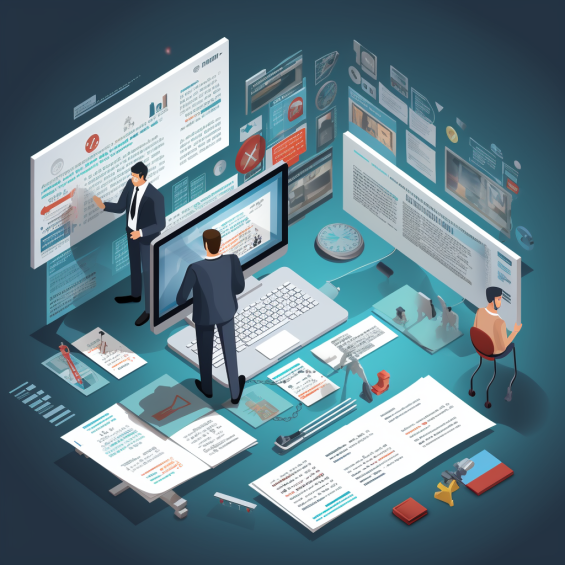

# **Task 1: Import Initial Libraries and Datasets**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'insurance_claims.csv'
insurance_df = pd.read_csv(file_path)


# **Task 2: Perform Exploratory Data Analysis**

In [ ]:
# Explore the first five rows in the DataFrame
insurance_df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN


In [ ]:
# Display basic information and the first few rows of the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

(None,
    months_as_customer  age  policy_number policy_bind_date policy_state  \
 0                 328   48         521585       10/17/2014           OH   
 1                 228   42         342868        6/27/2006           IN   
 2                 134   29         687698         9/6/2000           OH   
 
   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
 0    250/500               1000                1406.91               0   
 1    250/500               2000                1197.22         5000000   
 2    100/300               2000                1413.14         5000000   
 
    insured_zip  ... police_report_available total_claim_amount injury_claim  \
 0       466132  ...                     YES              71610         6510   
 1       468176  ...                       ?               5070          780   
 2       430632  ...                      NO              34650         7700   
 
   property_claim vehicle_claim  auto_make  auto_model auto_yea

In [ ]:
# Generate statistical summary
insurance_df.describe()

# **Task 3: Perform Data Preprocessing & Data Visualization**

## **Discussion & Analysis:**

### **Knowing Your Data: (Exploring the Dataset):**

In [ ]:
column_name = []
unique_value = []
most_common = []
least_common = []
column_type = []

# Iterate through the columns
for col in insurance_df:
    # If 2 or fewer unique categories
    column_name.append(str(col))
    unique_value.append(insurance_df[col].nunique())
    column_type.append(str(insurance_df[col].dtype))

    value_counts = insurance_df[col].value_counts()

    # Check if value_counts is not empty
    if not value_counts.empty:
        # Get the most common value and its count
        most_common_value = value_counts.idxmax()
        most_common_count = value_counts.max()
        most_common.append(f"{most_common_value} ({most_common_count})")

        # Get the least common value and its count
        least_common_value = value_counts.idxmin()
        least_common_count = value_counts.min()
        least_common.append(f"{least_common_value} ({least_common_count})")
    else:
        # In case of empty value_counts (all elements are NaN), we append 'NaN' to the corresponding lists
        most_common.append('NaN')
        least_common.append('NaN')

table = pd.DataFrame()
table['Column Name'] = column_name
table['Unique Values'] = unique_value
table['Most Common'] = most_common
table['Least Common'] = least_common
table['Data Type'] = column_type

table = table.sort_values('Unique Values', ascending=False)
table


# **Observations:**

- policy_number and incident_location are unique identifiers for each row in your dataset. Since these are unique for each row, they probably won't be useful for making predictions in a machine learning model.

- insured_zip and policy_annual_premium have very high cardinality. They are numerical fields with many distinct values. This suggests a lot of variability in these features, which could be useful for a machine learning model.

- policy_bind_date also has a high cardinality, but it is a date field. There may be some temporal trends that could be useful to extract from this feature.

- total_claim_amount, vehicle_claim, injury_claim, and property_claim are important features. They have high cardinality indicating a wide range of claim amounts. If there are certain values that are particularly common, these could potentially be associated with fraudulent activities.

- capital-loss and capital-gains have a substantial amount of zero values which indicates that most customers haven't experienced capital loss or gain.

- age, auto_model, incident_hour_of_the_day, auto_year, insured_hobbies and insured_occupation are also high-cardinality categorical variables. This suggests a diverse customer base.

- umbrella_limit is an interesting feature. It seems there's a substantial number of policies with no umbrella limit (as suggested by 798 occurrences of '0'). It would be interesting to see how this feature correlates with fraud_reported.

- There are several categorical variables with a smaller number of unique values, such as insured_education_level, incident_state, incident_city, insured_relationship, authorities_contacted, collision_type, incident_severity, incident_type, property_damage, police_report_available, policy_deductable, policy_csl, policy_state, insured_sex. These variables can be used to segment the data and may provide valuable insight when combined with other variables.

- fraud_reported, the target variable, is binary with more instances of 'No' (753 occurrences) than 'Yes' (247 occurrences). This indicates an imbalanced class problem, which may require special techniques when training a machine learning model.

- A few features such as collision_type, property_damage, and police_report_available appear to have missing values (as indicated by the '?'). These missing values will need to be handled before building a machine learning model.

Remember, this is just a high-level overview. You would need to perform more detailed exploratory data analysis and consider the context of the data to draw more concrete conclusions.

# **Outliers**

In [ ]:
import numpy as np

def detect_outliers(df, features):
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25) # 1st quartile (25%)
        Q3 = np.percentile(df[col], 75) # 3rd quartile (75%)
        IQR = Q3 - Q1 # Interquartile range (IQR)

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

        # print the number of outliers and the outlier data for each feature
        print(f"\nOutliers detected for {col}: {len(outlier_list_col)} instances")
        print(df.loc[outlier_list_col])

    # remove duplicate indices
    outlier_indices = list(set(outlier_indices))

    return outlier_indices

num_features = ['policy_annual_premium', 'total_claim_amount', 'vehicle_claim',
                'injury_claim', 'property_claim', 'capital-loss',
                'capital-gains', 'age', 'umbrella_limit']

outlier_indices = detect_outliers(insurance_df, num_features)
print(f"\nTotal number of unique outliers detected across all features: {len(outlier_indices)}")


- Policy Annual Premium: Outliers were identified in 9 instances, including policy numbers 790442, 649082, 241562, 326322, 349658, 719989, 230223, 984456, and 728025. These policies exhibit unusually high or low premiums, necessitating further analysis.

- Total Claim Amount: Policy number 214618 stands out with an exceptionally high total claim amount, marking it as an outlier.

- Vehicle Claim: All vehicle claim amounts are within a normal range, with no outliers detected.

- Injury Claim: Similarly, injury claim amounts are consistent and within expected limits, with no outliers.

- Property Claim: Six policies (numbers 346940, 515698, 714929, 357949, 528385, and 238196) are outliers in property claims, indicating significantly divergent claim amounts.

- Capital-Loss & Capital-Gains: No outliers were found in the capital-loss and capital-gains data, indicating typical financial transactions for the policies.

- Age: Four policyholders (policy numbers 346002, 852002, 911429, and 531160) are notably older than average, making their ages outliers.

- Umbrella Limit: A considerable number (202 out of 218) of policies have umbrella limits that are outliers, suggesting abnormally high coverage limits.

- Policy Details: The distribution of policies is well-balanced across OH, IL, and IN, with no clear dominance in terms of policy CSL and deductible.

- Insured Details: The dataset shows a balanced gender distribution with a slight female majority. Education levels are evenly spread, predominantly at the JD and High School levels. Reading and basketball are the most and least common hobbies, respectively, and 'own-child' is the most frequent relationship status.

- Incident Details: Multi-vehicle and single-vehicle collisions are prevalent. Rear collisions are the most common, while minor damage incidents outnumber total loss and major damage incidents.

- Authority Contact and Incident Location: Police reports are most common, followed by fire services and ambulance calls. NY, SC, and WV have the highest incident occurrences, with Springfield, Arlington, and Columbus being the top cities.

- Property Damage and Police Reports: Entries suggest that property damage is not always present, and police reports are not consistently available.

These observations provide insights into the dataset's characteristics but do not necessarily imply direct correlations with fraud. Analyzing how outliers in features like umbrella_limit correlate with fraudulent claims could be informative. For instance, understanding whether outliers in umbrella_limit are more common in fraudulent claims could guide outlier management strategies.

# **Missing Data**

In [ ]:
# Count of 'np.nan' for each column
nan_count = insurance_df.isnull().sum()

# Count of '?' for each column
question_mark_count = insurance_df.eq('?').sum()

# Combine the two Series into a DataFrame for a better view
missing_values_df = pd.DataFrame({'nan_count': nan_count, 'question_mark_count': question_mark_count})

print(missing_values_df)

#In this code:

#We calculate the count of np.nan values and ? values separately for each column using isnull().sum() and eq('?').sum() respectively,
#and store these in nan_count and question_mark_count.

#We then create a new DataFrame missing_values_df that has two columns: nan_count and
#question_mark_count. This DataFrame gives you a comprehensive view of the missing values in each column of insurance_df,
#irrespective of whether they are denoted as np.nan or ?.

In [ ]:
# now plot the heatmap with missing values represented as 'np.nan'
sns.heatmap(insurance_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

# **Distribution of Incident By State**

In [ ]:
import geopandas as gpd
import pandas as pd
import folium

# Create a DataFrame that counts the incidents by state
incident_counts = insurance_df['State'].value_counts().reset_index()
incident_counts.columns = ['State', 'Counts']

# The coordinates for each state's label
state_coords = {
    'South Carolina': [33.8361, -81.1637],
    'Virginia': [37.4316, -78.6569],
    'Albany': [40.7128, -74.0060],  # This refers to New York state
    'Ohio': [40.4173, -82.9071],
    'West Virginia': [38.5976, -80.4549],
    'North Carolina': [35.7596, -79.0193],
    'Pennsylvania': [41.2033, -77.1945]
}

# Create a basic map centered on the U.S.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Define a function to set color based on number of incidents
def set_color(count):
    if count <= 50:
        return 'green'
    elif 50 < count <= 150:
        return 'orange'
    else:
        return 'red'

# Adding the states and their incident counts to the map
for idx, row in incident_counts.iterrows():
    state = row['State']
    count = row['Counts']

    # Check if the state exists in our coordinates dictionary
    if state in state_coords:
        folium.CircleMarker(
            location=state_coords[state],
            radius=10,
            color=set_color(count),
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

        # Add the number of incidents as a label in the middle of the circle
        folium.Marker(
            location=state_coords[state],
            icon=folium.DivIcon(html=f"""<div style="font-size: 12pt; color: black;">{count}</div>""")
        ).add_to(m)

# Adding a legend to the map
legend_html = '''
<div style="position: fixed; bottom: 50px; right: 50px; z-index:9999; font-size:14px;">
    &nbsp;<b>States:</b><br>
'''

for state, color in zip(state_coords.keys(), ["green", "orange", "red"]):
    legend_html += f'<i class="fa fa-circle" style="color:{color}"></i> {state}<br>'

legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

m.save('incident_map_with_legend.html')
m


## **Step 1: Data Cleaning and Initial Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

# Drop completely empty columns first
insurance_df.dropna(axis=1, how='all', inplace=True)

# Replace '?' with np.nan
insurance_df.replace('?', np.nan, inplace=True)

# Fill NaN values with the mode of each column
for column in insurance_df.columns:
    mode_val = insurance_df[column].mode()
    if not mode_val.empty:  # Check if mode is not empty
        insurance_df[column].fillna(mode_val.iloc[0], inplace=True)  # Use the first mode value if there are multiple modes

# Convert 'incident_date' and 'policy_bind_date' columns to datetime format
insurance_df['incident_date'] = pd.to_datetime(insurance_df['incident_date'])
insurance_df['policy_bind_date'] = pd.to_datetime(insurance_df['policy_bind_date'])


## **Step 2: Feature Engineering**

In [ ]:
# Extract useful features from 'incident_date' and 'policy_bind_date'
insurance_df['incident_month'] = insurance_df['incident_date'].dt.month
insurance_df['incident_day_of_week'] = insurance_df['incident_date'].dt.dayofweek
insurance_df['policy_bind_year'] = insurance_df['policy_bind_date'].dt.year

# Drop original date columns
insurance_df.drop(['incident_date', 'policy_bind_date'], axis=1, inplace=True)


## **Step 3: Preparing Target Variable and Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Convert target variable to binary format
insurance_df['fraud_reported'] = insurance_df['fraud_reported'].map({'Y': 1, 'N': 0})

# Separate features (X) and target (y) variables
X = insurance_df.drop(['fraud_reported', 'incident_location', 'insured_zip', 'policy_number', 'auto_model', 'auto_year', 'auto_make'], axis=1)
y = insurance_df['fraud_reported']

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)


## **Step 4: Encoding Categorical Variables**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = one_hot_encoder.fit_transform(X_train[cat_cols])
X_test_encoded = one_hot_encoder.transform(X_test[cat_cols])

# Convert encoded arrays into DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(cat_cols), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(cat_cols), index=X_test.index)

# Drop original categorical columns and concatenate encoded columns
X_train.drop(cat_cols, axis=1, inplace=True)
X_test.drop(cat_cols, axis=1, inplace=True)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)


## **Step 5: Scaling Numerical Features and Final Adjustments**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = X.select_dtypes(exclude=['object']).columns

# Handling missing values introduced by one-hot encoding
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Check for columns with zero variance and drop them
zero_std_cols = X_train.columns[X_train.std() == 0]
X_train.drop(columns=zero_std_cols, inplace=True)
X_test.drop(columns=zero_std_cols, inplace=True)

# Apply standard scaling on numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# **SMOTE During Model Training:**

- No Data Leakage: If you're applying SMOTE only to the training data after splitting the dataset, there's no risk of data leakage. The model will be tested on real, unseen data, providing a more accurate performance estimate.
- More Realistic Scenario: Applying SMOTE only to the training set reflects a more realistic scenario where the model encounters imbalanced data in the real world, as is often the case in fraud detection.

# **Missing Data After Preprocessing - Data Post Handling of Missing Values**

In [ ]:
# check if there are any Null values
insurance_df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
State                          0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [ ]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

# **Checking the Dataset Colorations:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#insurance_df.corr()

# Calculate correlation matrix for numerical columns
corr_matrix = insurance_df.corr(numeric_only=True)

# Initialize a DataFrame to store the significant correlations
significant_correlations = pd.DataFrame(columns=["Feature1", "Feature2", "Correlation"])

# Iterate over the matrix's entries
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        # Skip self-correlations
        if col != idx:
            # Store significant correlations in the DataFrame. Feel free to change the threshold
            if abs(corr_matrix.loc[idx, col]) > 0.5:
                new_row = pd.DataFrame({"Feature1": [idx],
                                        "Feature2": [col],
                                        "Correlation": [corr_matrix.loc[idx, col]]})
                significant_correlations = pd.concat([significant_correlations, new_row], ignore_index=True)

# Print significant correlations
print(significant_correlations)


plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# months as customer and age have positive correlations with charges

Here are some key observations from the results:

1- "months_as_customer" and "age" have a very high positive correlation (0.92), which means that as the number of months as a customer increases, the age of the customer also tends to increase.

2- "total_claim_amount" is highly positively correlated with "injury_claim" (0.805), "property_claim" (0.811), and "vehicle_claim" (0.983). This means that when the total claim amount increases, the amounts of these individual types of claims also tend to increase.

3- "incident_hour_of_the_day" has a positive correlation with "number_of_vehicles_involved" (0.12) and "total_claim_amount" (0.218), meaning these variables tend to increase together.

4- "auto_year" shows very low correlation with other variables, implying that the year of the automobile is generally not a strong indicator for other variables in the dataset.

5- "capital-gains" and "capital-loss" show a negative correlation (-0.047), indicating that as capital gains increase, capital losses tend to decrease, and vice versa.

6- "policy_deductable" and "bodily_injuries" show a negative correlation (-0.023), meaning as policy deductible increases, bodily injuries tend to decrease.

Remember, correlation does not imply causation. These are just statistical relationships and don't indicate that one variable's movement directly causes the other to change.

In [ ]:
insurance_df[['injury_claim', 'total_claim_amount', 'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported', 'age','months_as_customer']].hist(bins = 30, figsize = (12, 12), color = 'r');

#Descriptive statistics
# List of column names
cols = ['injury_claim', 'total_claim_amount', 'property_claim', 'vehicle_claim', 'auto_year', 'age', 'months_as_customer', 'fraud_reported']

# Generate descriptive statistics
report = insurance_df[cols].describe(include='all')

print(report)

In [ ]:
# plot pairplot
sns.pairplot(insurance_df)

# **Analyzing the Imbalance in 'Insurance_claims' Dataset**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the counts
counts = insurance_df['fraud_reported'].value_counts()
print(counts)

f, ax = plt.subplots(figsize=(10, 10))
sns_countplot = sns.countplot(x='fraud_reported', data=insurance_df)

# Setting custom labels for the x-ticks
ax.set_xticklabels(['Non-fraud = 0', 'Fraud = 1'])

# Adding legend using the patches of the countplot and incorporating the counts
labels = [f'Non-fraud ({counts[0]})', f'Fraud ({counts[1]})']
ax.legend(handles=sns_countplot.patches, labels=labels, loc='upper right')

plt.show()


# **Understanding your Data Distribution to Output Features (Fraud_Reported)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Variables of interest and their names
variables = {
    'insured_hobbies': "Insured Hobbies",
    'incident_type': "Incident Type",
    'auto_make': "Auto Make",
    'umbrella_limit': "Umbrella Limit"
}

# Create subplots
fig, ax = plt.subplots(len(variables), 1, figsize=(20, 20))

for i, (var, name) in enumerate(variables.items()):
    # Plot counts
    sns.countplot(data=insurance_df, x=var, hue='fraud_reported', ax=ax[i])
    ax[i].set_title(f'Fraud reported by {name}')

    # Compute the percentage of fraud reported
    fraud_by_var = insurance_df.groupby(var)['fraud_reported'].mean() * 100

    display(Markdown(f"""
    ### {name}
    The percentages of fraud reported per {name.lower()} are as follows:\n
    {fraud_by_var.to_string()}
    """))

# Show the plot
plt.tight_layout()
plt.show()


From the analysis, the following observations can be made:

**1. Insured Hobbies:**

* Chess (82.6%) and cross-fit (74.3%) are the hobbies associated with the highest percentage of reported fraud.
* Meanwhile, hobbies like camping (9.09%) and kayaking (9.26%) are associated with the lowest fraud reports.
* This suggests that there might be a correlation between specific hobbies and the likelihood of a claim being fraudulent.



**2. Incident Type:**

* Single Vehicle Collision (29.03%) and Multi-vehicle Collision (27.21%) have the highest percentage of reported fraud among incident types.
* Vehicle Theft (8.51%) and Parked Car (9.52%) incidents have the lowest rates of fraud.
* This suggests that incidents involving collisions are more likely to be associated with fraudulent claims.

**3. Auto Make:**

* Mercedes (33.85%) and Audi (30.43%) have the highest percentage of reported fraud among car makes.
* Jeep (16.42%) and Nissan (17.95%) are at the lower end of the spectrum.
* This indicates that certain car brands might be more commonly associated with fraudulent claims, possibly due to factors such as their value or theft rate.

**4. Umbrella Limit:**

* Policies with an umbrella limit of 2,000,000 and 10,000,000 show high fraud report percentages (66.67% and 50.00% respectively).
* However, policies with an umbrella limit of -1,000,000 and 3,000,000 have significantly lower rates (0.00% and 16.67% respectively).
* This could mean that a higher umbrella limit might be associated with a greater likelihood of fraudulent claims, possibly due to the higher potential payout.

# **Task 4: Models Training and Evaluation**

# **Model 1: Train An XG-Boost Classifier Model**

Before SMOTE: Counter({0: 529, 1: 171})
After SMOTE: Counter({0: 529, 1: 529})


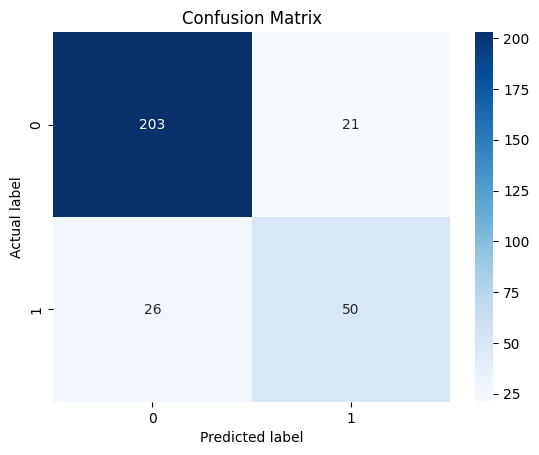


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       224
           1       0.70      0.66      0.68        76

    accuracy                           0.84       300
   macro avg       0.80      0.78      0.79       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

# Summarize class distribution before SMOTE
counter_before = Counter(y_train)
print("Before SMOTE:", counter_before)

# Apply SMOTE
smote = SMOTE(random_state=42)

# Resample the training data - (Applying SMOTE to the Training Data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Summarize the new class distribution after SMOTE
counter_after = Counter(y_train_resampled)
print("After SMOTE:", counter_after)

# Initialize XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)

# Train the model
model_xgb.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = model_xgb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feature_importances = model_xgb.feature_importances_
feature_names = X_train_resampled.columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)



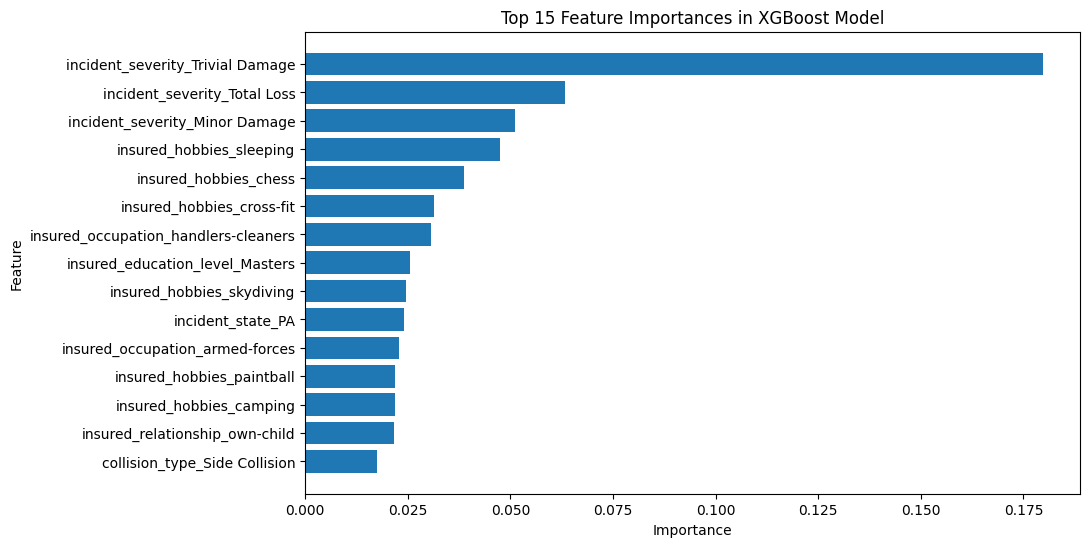

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       224
           1       0.70      0.75      0.73        76

    accuracy                           0.86       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.86      0.86      0.86       300



In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import classification_report

# Assuming 'feature_importances_df' is already created from previous model training
# Select top N important features
N = 15
top_features = feature_importances_df['Feature'].head(N)

# Plot the feature importance for top 15
plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importances_df.set_index('Feature').loc[top_features, 'Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Reduce training and test set to top N features
X_train_top_features = X_train_resampled[top_features]
X_test_top_features = X_test[top_features]

# Retrain the model
model_xgb_top_features = xgb.XGBClassifier(random_state=42)
model_xgb_top_features.fit(X_train_top_features, y_train_resampled)

# Predictions and evaluation
y_pred_top_features = model_xgb_top_features.predict(X_test_top_features)
print(classification_report(y_test, y_pred_top_features))


# **As it can be seen using Feature Importance enhanced the model**

# **Black Box Challenge in Machine Learning**

In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b0a273944dcded96693fa81877144244d3b19d7c7e6ce24a9f3c19f87e7823ae
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


## **LIME**

In [ ]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Your XGBoost model training code remains unchanged...

# Initialize the LIME explainer
# Note: Use training data before SMOTE for more representative explanations
explainer = LimeTabularExplainer(X_train.values,
                                 mode='classification',
                                 training_labels=y_train,
                                 feature_names=X_train.columns.tolist(),
                                 categorical_features=X_train.select_dtypes(include=['category', 'object']).columns.tolist(),
                                 verbose=True,
                                 class_names=['Non-Fraud', 'Fraud'],
                                 kernel_width=3)

# Choose a random instance from the test set
i = np.random.randint(0, X_test.shape[0])
print("Selected instance index:", i)

# Explain the prediction for this instance
exp = explainer.explain_instance(X_test.iloc[i].values, model_xgb.predict_proba, num_features=10)

# Visualize the explanation
# For Jupyter Notebook:
exp.show_in_notebook(show_table=True, show_all=False)
# For other environments, use exp.as_pyplot_figure()

# Display the explanation as a list
print("\nExplanation for instance", i, ":\n", exp.as_list())


Selected instance index: 173
Intercept 0.9321605826807648
Prediction_local [0.11474574]
Right: 0.0031530051



Explanation for instance 173 :
 [('insured_hobbies_chess <= 0.00', -0.5722655316679672), ('insured_hobbies_cross-fit <= 0.00', -0.5122464521885756), ('0.00 < incident_severity_Minor Damage <= 1.00', -0.3922767273140203), ('incident_severity_Total Loss <= 0.00', 0.3504423891305597), ('incident_severity_Trivial Damage <= 0.00', 0.21698335792508552), ('insured_occupation_priv-house-serv <= 0.00', 0.08385345909396129), ('incident_state_PA <= 0.00', 0.0709239224809627), ('-0.99 < incident_month <= 0.92', -0.06357247684914359), ('insured_hobbies_kayaking <= 0.00', 0.06296775768154027), ('0.15 < capital-loss <= 0.94', -0.062224537306879775)]


# **SHAP**

[13:10:26] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


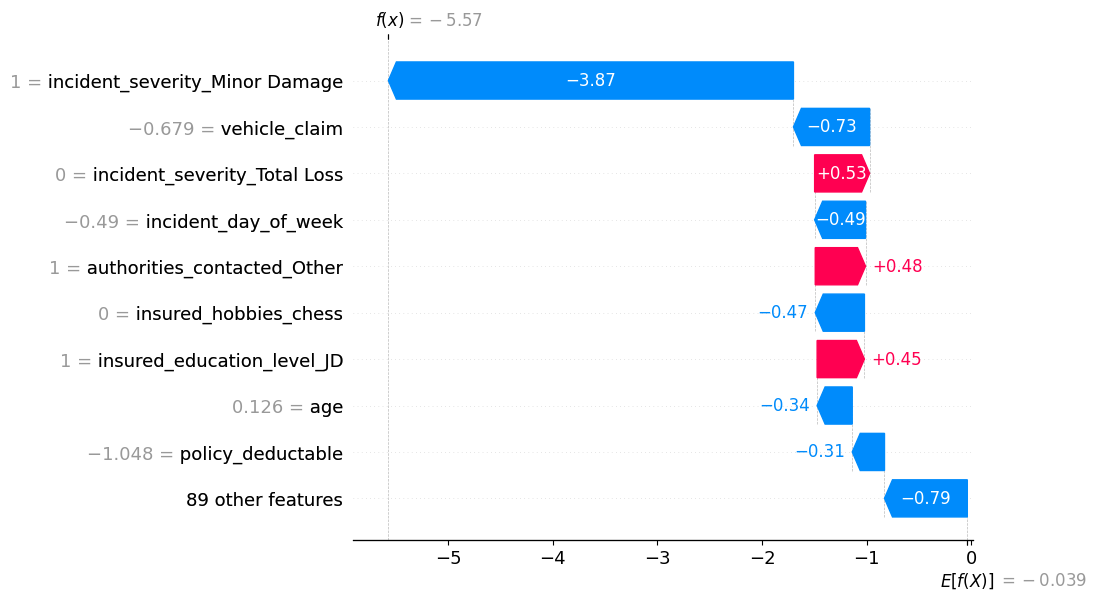

SHAP values for instance 1:
incident_severity_Minor Damage   -3.869798
vehicle_claim                    -0.727659
incident_severity_Total Loss      0.525065
incident_day_of_week             -0.486243
authorities_contacted_Other       0.480388
insured_hobbies_chess            -0.469728
insured_education_level_JD        0.451778
age                              -0.335477
policy_deductable                -0.308177
insured_hobbies_cross-fit        -0.288863
dtype: float32
-----------------------------
SHAP values for instance 2:
incident_severity_Total Loss     -3.917073
property_claim                   -0.590263
insured_hobbies_board-games       0.564420
incident_severity_Minor Damage    0.504136
policy_annual_premium            -0.423670
policy_csl_250/500                0.389339
insured_hobbies_chess            -0.359118
policy_state_IN                  -0.329125
policy_bind_year                 -0.282726
authorities_contacted_Other       0.281925
dtype: float32
------------------------

In [ ]:
import xgboost as xgb
import shap
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

# ... [Your XGBoost model training code remains unchanged] ...

# Initialize SHAP Explainer with your XGBoost model
explainer = shap.Explainer(model_xgb)

# Calculate SHAP values for the training set - using the resampled data
shap_values = explainer(X_train_resampled)

# Visualize the explanation for the first instance in your training set
shap.plots.waterfall(shap_values[0])

# Function to print SHAP values as a report for the given instances
def print_shap_report(shap_values, instances, feature_names):
    for idx in range(len(instances)):
        print(f"SHAP values for instance {idx + 1}:")
        shap_instance = pd.Series(shap_values.values[idx], index=feature_names)
        sorted_shap = shap_instance.abs().sort_values(ascending=False)

        # Print only the top 10 most impactful features
        top_features = sorted_shap.head(10).index
        print(shap_instance[top_features])
        print("-----------------------------")

# Print the SHAP report for the first 10 instances in the training set
print_shap_report(shap_values, X_train_resampled.iloc[:10, :], X_train_resampled.columns)


From the outputs, here are some observations related to fraud_reported:

**Vehicle Claim**: This variable often appears to play a significant role in the prediction, whether it's below or above certain thresholds. The direction of its influence varies based on the specific value range.

**Policy State**: This variable seems to consistently impact the likelihood of a fraudulent claim, with specific state like 'IN' often highlighted.

**Policy CSL**: Policy Combined Single Limit (CSL) seems to have a consistent influence on the prediction. When CSL is at a higher level (e.g., 250/500), it may slightly increase the chance of fraudulent activity.

**Insured Hobbies**: Activities such as 'chess' and 'cross-fit' appear in several places. Interestingly, having 'chess' as a hobby seems to decrease the chance of fraud, while 'cross-fit' increases the likelihood. However, these might not be practically significant or actionable insights as hobbies may not directly relate to fraudulent behavior.

**Day of the Week**: The day of the week when the incident occurred appears to be significant in some predictions. It may indicate that certain days of the week are more prone to fraudulent claims.

**Incident Severity**: From the SHAP summary plot, it's apparent that incident severity, especially 'Total Loss' and 'Minor Damage', have a strong impact on the model's prediction. 'Total Loss' significantly increases the likelihood of fraud, while 'Minor Damage' decreases it.

**Vehicle Age and Make**: These features seem to have a strong influence on predictions, where certain ages or makes are more associated with fraudulent claims.

It's important to note that these insights are based on the model's interpretation and actual insights may vary based on the dataset. Furthermore, while these insights could be used to detect potential fraud, they should be used cautiously to avoid unfair bias or discrimination. For instance, factors like hobbies or the day of the week are unlikely to be causal factors in fraud and could reflect other underlying patterns in the data.

# **Model 2: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER**

In [ ]:
X_train

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
541,239,41,1000,1325.44,7000000,474898,51400,-6300,22,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,108,31,2000,1175.70,0,608767,0,0,14,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,116,30,500,951.46,0,467227,0,-35500,8,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,8,21,500,1021.90,0,464237,0,0,21,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,161,38,2000,1133.85,0,439870,60200,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,464,61,1000,1125.37,0,604450,0,-56400,6,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
270,369,55,2000,1589.54,0,444734,55400,0,6,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,230,42,1000,1023.11,0,476130,0,-45300,13,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,102,28,500,1075.41,0,445648,55200,0,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Before SMOTE: Counter({0: 529, 1: 171})
After SMOTE: Counter({0: 529, 1: 529})


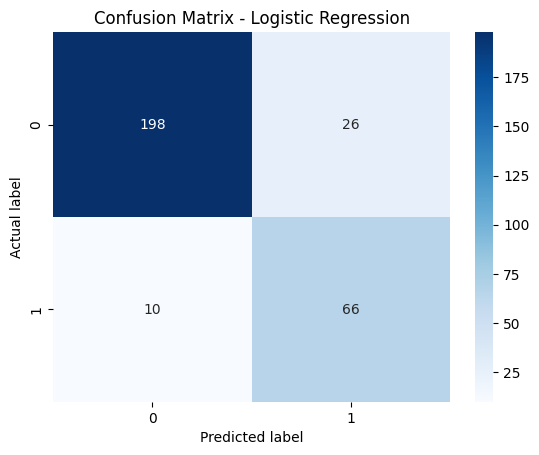


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92       224
           1       0.72      0.87      0.79        76

    accuracy                           0.88       300
   macro avg       0.83      0.88      0.85       300
weighted avg       0.89      0.88      0.88       300



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Summarize class distribution before SMOTE
counter_before = Counter(y_train)
print("Before SMOTE:", counter_before)

# Apply SMOTE
smote = SMOTE(random_state=42)

# Resample the training data - (Applying SMOTE to the Training Data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure X_test has the same columns as X_train_res in the same order
X_test = X_test[X_train_resampled.columns]

# Summarize the new class distribution after SMOTE
counter_after = Counter(y_train_resampled)
print("After SMOTE:", counter_after)

# Train a Logistic Regression classifier model
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(X_train_resampled, y_train_resampled)  # Use the resampled training data

# Predictions on the test set
y_pred_lr = model_LR.predict(X_test)

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification report for Logistic Regression
report_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report for Logistic Regression:\n", report_lr)


# **Model 3: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER**

Before SMOTE: Counter({0: 529, 1: 171})
After SMOTE: Counter({0: 529, 1: 529})


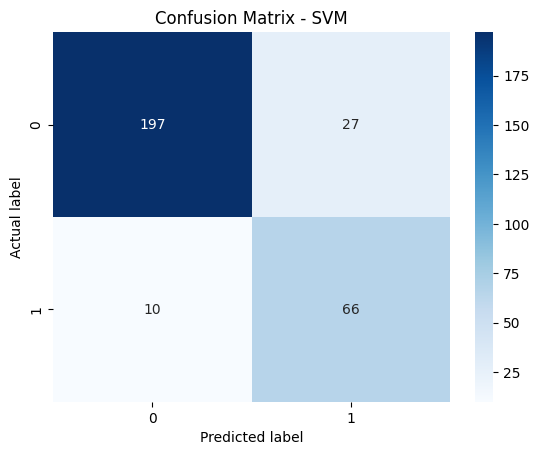


Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       224
           1       0.71      0.87      0.78        76

    accuracy                           0.88       300
   macro avg       0.83      0.87      0.85       300
weighted avg       0.89      0.88      0.88       300



In [ ]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# Summarize class distribution before SMOTE
counter_before = Counter(y_train)
print("Before SMOTE:", counter_before)

# Apply SMOTE
smote = SMOTE(random_state=42)

# Resample the training data - (Applying SMOTE to the Training Data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure X_test has the same columns as X_train_res in the same order
X_test = X_test[X_train_resampled.columns]

# Summarize the new class distribution after SMOTE
counter_after = Counter(y_train_resampled)
print("After SMOTE:", counter_after)

# Train a SVM classifier model
#svm = SVC(max_iter=10000, probability=True, random_state=42) # very bad results so leave it.
#model_svm = CalibratedClassifierCV(svm)  # Wrap SVC in CalibratedClassifierCV
#model_svm.fit(X_train_resampled, y_train_resampled)

svm = LinearSVC(max_iter=10000)
model_svm = CalibratedClassifierCV(svm) # Wrap SVC in CalibratedClassifierCV
model_svm.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - SVM')
plt.show()

# Classification report
report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report for SVM:\n", report_svm)


# Compute class weights
#counter = Counter(y_train)
#estimate = counter[0] / counter[1]
#class_weights = {0: 1., 1: estimate}

In [ ]:
try:
    model_svm.fit(X_train_resampled, y_train_resampled)
    print("Model fitted successfully.")
except Exception as e:
    print("Error occurred:", e)


Model fitted successfully.


In summary, the significant improvement in the model's performance after switching to LinearSVC suggests that for "Insurance_Claims" specific dataset and problem, a linear decision boundary is more appropriate, or the LinearSVC is better handling the scale and complexity of your data.

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


# **SVM Model Optimization**

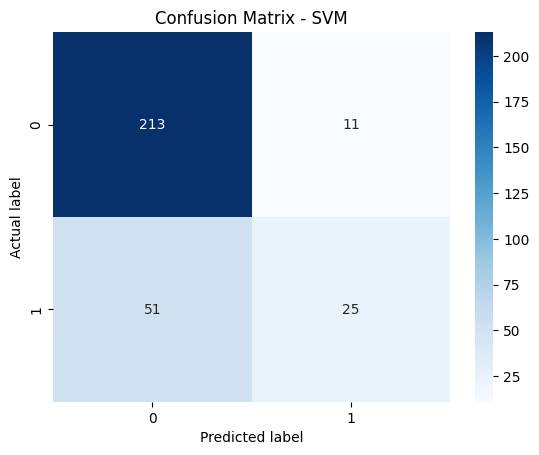


Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       224
           1       0.70      0.87      0.78        76

    accuracy                           0.87       300
   macro avg       0.83      0.87      0.84       300
weighted avg       0.89      0.87      0.88       300



In [ ]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Other pre-processing steps assumed to be done already

# Define a LinearSVC with class weight balanced
svm = LinearSVC(max_iter=20000, class_weight='balanced')  # Increased max_iter

# Wrap LinearSVC in CalibratedClassifierCV
model_svm = CalibratedClassifierCV(svm)

# Set up grid search to find the best parameters (example: C)
param_grid = {'estimator__C': [0.1, 1, 10]}  # Updated to 'estimator__C'

grid_search = GridSearchCV(model_svm, param_grid, cv=5, scoring='recall', n_jobs=-1)

# Train the model using grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model after grid search
best_svm = grid_search.best_estimator_

# Predictions on the test set
y_pred_svm = best_svm.predict(X_test)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - SVM')
plt.show()

# Classification report
report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report for SVM:\n", report_svm)


# **Model 4: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER**

Before SMOTE: Counter({0: 529, 1: 171})
After SMOTE: Counter({0: 529, 1: 529})
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       224
           1       0.69      0.33      0.45        76

    accuracy                           0.79       300
   macro avg       0.75      0.64      0.66       300
weighted avg       0.78      0.79      0.76       300



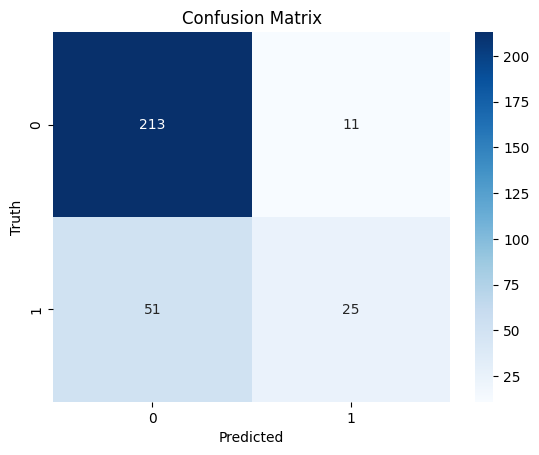

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Summarize class distribution before SMOTE
counter_before = Counter(y_train)
print("Before SMOTE:", counter_before)

# Apply SMOTE
smote = SMOTE(random_state=42)

# Resample the training data - (Applying SMOTE to the Training Data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure X_test has the same columns as X_train_res in the same order
X_test = X_test[X_train_resampled.columns]

# Summarize the new class distribution after SMOTE
counter_after = Counter(y_train_resampled)
print("After SMOTE:", counter_after)

# Train a Random Forest classifier model
model_rf = RandomForestClassifier() #(class_weight=class_weights) if Not used SMOTE need to use class weights
model_rf.fit(X_train_resampled, y_train_resampled)  # This line trains the model using the resampled training data
#The SMOTE algorithm has already handled the class imbalance issue.
#The class weights are used to give more importance to the minority class during training.Since used SMOTE no need for class weights

# Compute class weights
#estimate = counter[0] / counter[1]
#class_weights = {0: 1., 1: estimate}

# Predict on the test data
y_predict = model_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict) # Note that the true labels (y_test) should go first

# Compute classification report
report = classification_report(y_test, y_predict)
print(report)

# Display the confusion matrix as a Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.

# **Model 5: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Summarize class distribution before SMOTE
counter_before = Counter(y_train)
print("Before SMOTE:", counter_before)

# Apply SMOTE
smote = SMOTE(random_state=42)

# Resample the training data - (Applying SMOTE to the Training Data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure X_test has the same columns as X_train_res in the same order
X_test = X_test[X_train_resampled.columns]

# Summarize the new class distribution after SMOTE
counter_after = Counter(y_train_resampled)
print("After SMOTE:", counter_after)

# Train a K-Nearest Neighbour (KNN) model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_resampled)  # This line trains the model using the resampled training data

#when using KNeighborsClassifier, make sure your features are scaled, as KNN is a distance-based algorithm and can be sensitive to
#the scale of the data. If your features are not on the same scale, consider using StandardScaler or MinMaxScaler to normalize your features.

Before SMOTE: Counter({0: 529, 1: 171})
After SMOTE: Counter({0: 529, 1: 529})


KNeighborsClassifier()

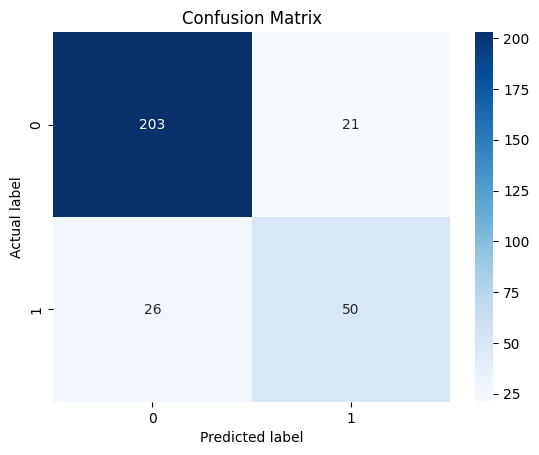


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       224
           1       0.70      0.66      0.68        76

    accuracy                           0.84       300
   macro avg       0.80      0.78      0.79       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
# Predict on the test data
y_pred = model_knn.predict(X_test) # Changed variable name from y_predict to y_pred for consistency

# Display the confusion matrix as a Seaborn heatmap
cm = confusion_matrix(y_test, y_pred) # Note that the true labels (y_test) should go first
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


# **Model 6: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Summarize class distribution before SMOTE
counter_before = Counter(y_train)
print("Before SMOTE:", counter_before)

# Apply SMOTE
smote = SMOTE(random_state=42)

# Resample the training data - (Applying SMOTE to the Training Data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure X_test has the same columns as X_train_res in the same order
X_test = X_test[X_train_resampled.columns]

# Summarize the new class distribution after SMOTE
counter_after = Counter(y_train_resampled)
print("After SMOTE:", counter_after)

# Train a Gaussian Naive Bayes model
model_gnb = GaussianNB()
model_gnb.fit(X_train_resampled, y_train_resampled)  # This line trains the model using the resampled training data


Before SMOTE: Counter({0: 529, 1: 171})
After SMOTE: Counter({0: 529, 1: 529})


GaussianNB()

              precision    recall  f1-score   support

           0       0.86      0.67      0.76       224
           1       0.42      0.68      0.52        76

    accuracy                           0.68       300
   macro avg       0.64      0.68      0.64       300
weighted avg       0.75      0.68      0.70       300



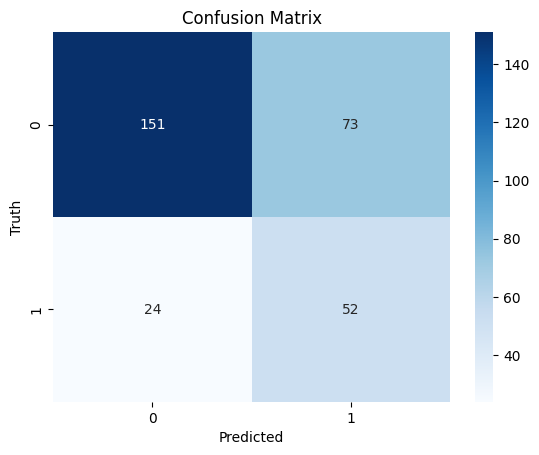

In [ ]:
# Predict on the test data
y_predict = model_gnb.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict) # Note that the true labels (y_test) should go first

# Compute classification report
report = classification_report(y_test, y_predict)
print(report)

# Display the confusion matrix as a Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


# **Model 7: TRAIN AND EVALUATE LGBM Classifier**

In [ ]:
from lightgbm import LGBMClassifier

# Summarize class distribution before SMOTE
counter_before = Counter(y_train)
print("Before SMOTE:", counter_before)

# Apply SMOTE
smote = SMOTE(random_state=42)

# Resample the training data - (Applying SMOTE to the Training Data)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ensure X_test has the same columns as X_train_res in the same order
X_test = X_test[X_train_resampled.columns]

# Summarize the new class distribution after SMOTE
counter_after = Counter(y_train_resampled)
print("After SMOTE:", counter_after)

# Instantiate and train a LGBMClassifier model
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train_resampled, y_train_resampled)  # This line trains the model using the resampled training data

#The LGBMClassifier (Light Gradient Boosting Machine) is a gradient boosting framework that uses tree-based learning algorithms.
#It is designed to be distributed and efficient with the following advantages:
# 1- faster training speed and higher efficiency,
# 2- lower memory usage, better accuracy,
# 3- support of parallel and GPU learning,
# 4- and capable of handling large-scale data.


Before SMOTE: Counter({0: 529, 1: 171})
After SMOTE: Counter({0: 529, 1: 529})
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 529, number of negative: 529
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5039
[LightGBM] [Info] Number of data points in the train set: 1058, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       224
           1       0.67      0.61      0.63        76

    accuracy                           0.82       300
   macro avg       0.77      0.75      0.76       300
weighted avg       0.82      0.82      0.82       300



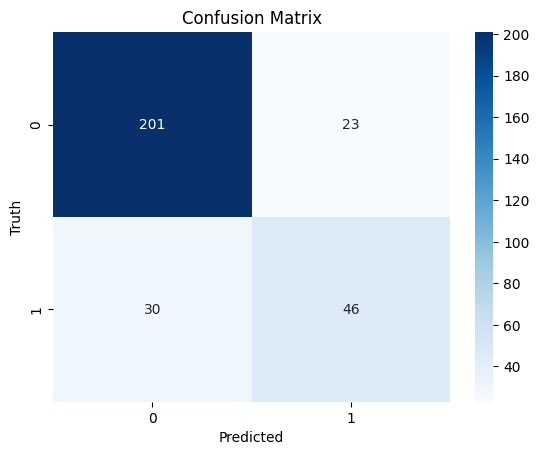

In [ ]:
# Predict on the test data
y_predict = model_lgbm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict) # Note that the true labels (y_test) should go first

# Compute classification report
report = classification_report(y_test, y_predict)
print(report)

# Display the confusion matrix as a Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


# **Model 8: TRAIN AND EVALUATE Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define your classifiers
classifiers = [('XG-Boost Classifier', model_xgb),
               ('Logistic Regression', model_LR),
               ('Support Vector Machine', model_svm),
               ('Random Forest', model_rf),
               ('K-Nearest Neighbors', model_knn),
               ('Naive Bayes', model_gnb),
               ('LGBM Classifier', model_lgbm)]

# Instantiate the VotingClassifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Fit the VotingClassifier
voting_clf.fit(X_train_resampled, y_train_resampled)  # This line trains the model using the resampled training data


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 529, number of negative: 529
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5039
[LightGBM] [Info] Number of data points in the train set: 1058, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('XG-Boost Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=N...
                                            random_state=42, ...)),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=10000)),
                             ('Support Vector Machine',
                              CalibratedClassifierCV(estimator=LinearSVC(class_weight='balanced',
                                                                         max_iter=20000))),
                             ('Random Forest', RandomForestClassifier()),
                             ('K-Nearest Neighbors', KNeighborsClassifier()),
                             ('Naive Bayes', GaussianNB()),
                             ('LGBM Classifier', LGBMClassifier())],
                 voting='soft')

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       224
           1       0.72      0.78      0.75        76

    accuracy                           0.87       300
   macro avg       0.82      0.84      0.83       300
weighted avg       0.87      0.87      0.87       300



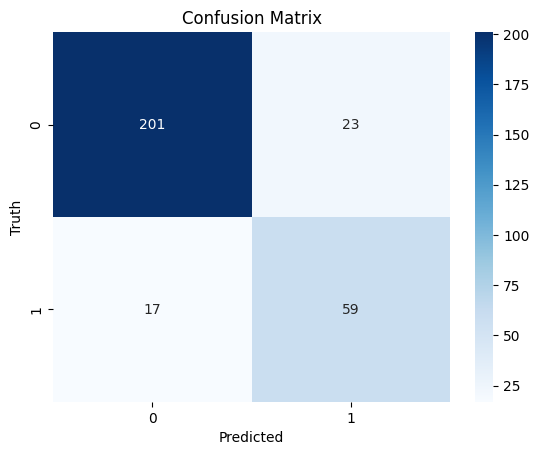

In [ ]:
# Predict on the test data
y_predict = voting_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predict) # Note that the true labels (y_test) should go first

# Compute classification report
report = classification_report(y_test, y_predict)
print(report)

# Display the confusion matrix as a Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


# **TASK 5: PLOT ROC CURVES FOR THE 8 MODELS AND FIND AUC SCORES**

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, model_lgbm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, voting_clf.predict_proba(X_test)[:, 1], pos_label = 1)

In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score0 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])
auc_score6 = roc_auc_score(y_test, model_lgbm.predict_proba(X_test)[:, 1])
auc_score7 = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])

print("XG-Boost Classifier: ", auc_score0) # XG-Boost
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes
print("LGBMClassifier: ", auc_score6) # LGBM
print("VotingClassifier: ", auc_score7) # Voting

XG-Boost Classifier:  0.8755286654135338
Logistic Regression:  0.9101268796992481
Support Vector Machine:  0.911125469924812
Random Forest:  0.87890625
K-Nearest Neighbors:  0.5787124060150377
Naive Bayes:  0.775375939849624
LGBMClassifier:  0.870829417293233
VotingClassifier:  0.8945606203007518


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score

# Initialize an empty list
summary = []
models = {
    "XG-Boost Classifier": model_xgb,
    "Logistic Regression": model_LR,
    "Support Vector Machine": model_svm,
    "Random Forest": model_rf,
    "K-Nearest Neighbors": model_knn,
    "Naive Bayes": model_gnb,
    "LGBMClassifier": model_lgbm,
    "VotingClassifier": voting_clf
}

for name, model in models.items():
    y_predict = model.predict(X_test)
    report_dict = classification_report(y_test, y_predict, output_dict=True)
    precision = report_dict['weighted avg']['precision']
    recall = report_dict['weighted avg']['recall']
    f1_score = report_dict['weighted avg']['f1-score']
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Append this model's metrics to the summary list
    summary.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'AUC': auc_score
    })

# Convert the summary list to a DataFrame
summary_df = pd.DataFrame(summary)

# Show the summary
print(summary_df)


                    Model  Precision    Recall  F1-Score       AUC
0     XG-Boost Classifier   0.840296  0.843333  0.841534  0.875529
1     Logistic Regression   0.892508  0.880000  0.883492  0.910127
2  Support Vector Machine   0.890381  0.876667  0.880437  0.911125
3           Random Forest   0.778350  0.793333  0.764899  0.878906
4     K-Nearest Neighbors   0.701504  0.440000  0.445303  0.578712
5             Naive Bayes   0.749653  0.676667  0.696224  0.775376
6          LGBMClassifier   0.818586  0.823333  0.820428  0.870829
7        VotingClassifier   0.870717  0.866667  0.868293  0.894561


AUC Score (XG-Boost):  0.8755286654135338
AUC Score (Logistic Regression):  0.9101268796992481
AUC Score (Support Vector Machine):  0.911125469924812
AUC Score (Random Forest):  0.87890625
AUC Score (K-Nearest Neighbors):  0.5787124060150377
AUC Score (Naive Bayes):  0.775375939849624
AUC Score (LGBM Classifier):  0.870829417293233
AUC Score (Voting Classifier):  0.8945606203007518


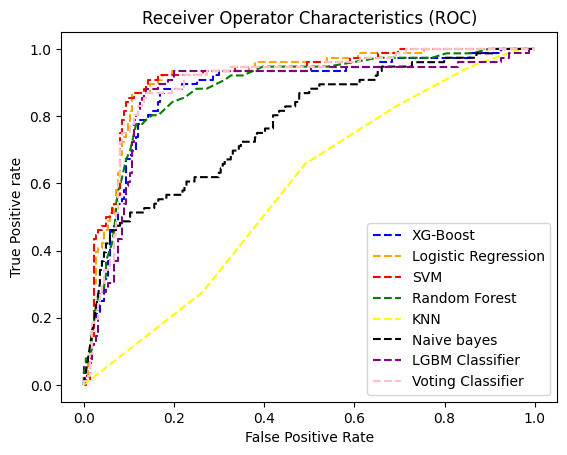

In [ ]:
from sklearn.metrics import auc

# Compute AUC scores
auc_score0 = auc(fpr0, tpr0)
auc_score1 = auc(fpr1, tpr1)
auc_score2 = auc(fpr2, tpr2)
auc_score3 = auc(fpr3, tpr3)
auc_score4 = auc(fpr4, tpr4)
auc_score5 = auc(fpr5, tpr5)
auc_score6 = auc(fpr6, tpr6)
auc_score7 = auc(fpr7, tpr7)

# Print AUC scores
print("AUC Score (XG-Boost): ", auc_score0)
print("AUC Score (Logistic Regression): ", auc_score1)
print("AUC Score (Support Vector Machine): ", auc_score2)
print("AUC Score (Random Forest): ", auc_score3)
print("AUC Score (K-Nearest Neighbors): ", auc_score4)
print("AUC Score (Naive Bayes): ", auc_score5)
print("AUC Score (LGBM Classifier): ", auc_score6)
print("AUC Score (Voting Classifier): ", auc_score7)


# ROC curve
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "XG-Boost")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Naive bayes")
plt.plot(fpr6, tpr6, linestyle = "--", color = "purple", label = "LGBM Classifier")
plt.plot(fpr7, tpr7, linestyle = "--", color = "pink", label = "Voting Classifier")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# **TASK 6: Models Comparison**

In [ ]:
import pandas as pd
import plotly.express as px

# Define a list with the model names
models_list = ["XG-Boost Classifier", "Logistic Regression", "Support Vector Machine",
               "Random Forest", "K-Nearest Neighbors", "Naive Bayes", "LGBM Classifier", "Voting Classifier"]

# Define a list with the AUC scores
scores_list = [auc_score0, auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6, auc_score7]

# Create a DataFrame from the lists
models_df = pd.DataFrame(list(zip(models_list, scores_list)), columns =['Model', 'Score'])

# Sort DataFrame by score in ascending order
models_df = models_df.sort_values('Score', ascending=True)

# Create the bar plot
fig = px.bar(models_df, y='Model', x='Score', color='Score',
             color_continuous_scale='viridis',
             labels={'Score':'AUC Score'},
             title='Models Comparison',
             template='plotly_dark',
             orientation='h')

# Display the plot
fig.show()


# **Final Lab Project: Fraud Detection in Insurance Claims Using AutoGluon**

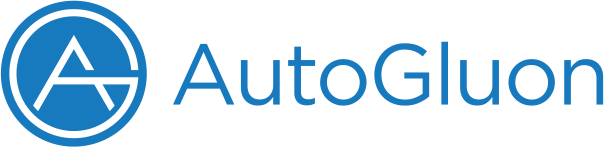

## **Step 1: LOADING IMPORTANT LIBRARIES AND DATASETS**

Let's start by loading the insurance_claims.csv file and conducting an initial exploratory data analysis to understand the dataset's structure. Then, you will follow through with preprocessing and setting up the AutoGluon classifier to predict the 'fraud_reported' column.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from autogluon.tabular import TabularPredictor

# Load the dataset
file_path = 'insurance_claims.csv'
insurance_claims_df = pd.read_csv(file_path)

insurance_claims_df


# **Step 2: PERFORM EXPLORATORY DATA ANALYSIS**

In [ ]:
# Display the first few rows of the dataframe
insurance_claims_df.head(3)

In [ ]:
# Explore the last five rows in the DataFrame
insurance_claims_df.tail()

In [ ]:
# Generate statistical summary
insurance_claims_df.describe()

In [ ]:
# Display basic information about the dataset
insurance_claims_df_info = insurance_claims_df.info()

insurance_claims_df_info, insurance_claims_df_head

The dataset consists of 1000 entries and 41 columns. Each column represents a feature that could be relevant to insurance claims and potentially to fraud detection. However, it's noted that there is an extra column _c39 which seems to contain only NaN values. This column is likely an artifact of the data collection process and should be removed.




In [ ]:
# check if there are any Null values
sns.heatmap(insurance_claims_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
# check if there are any Null values
insurance_claims_df.isnull().sum()

In [ ]:
# plot pairplot
sns.pairplot(insurance_claims_df)

# **Step 3: DATA CLEANING AND PREPROCESSING**

Let's start by cleaning the data and preparing it for analysis and modeling.

In [ ]:
# Data Cleaning Steps

# Remove the column with NaN values
insurance_claims_df.drop(columns=['_c39'], inplace=True)

# Replace '?' with NaN
insurance_claims_df.replace('?', pd.NA, inplace=True)

# Convert dates to datetime objects and extract year, month, and day as separate features
insurance_claims_df['policy_bind_date'] = pd.to_datetime(insurance_claims_df['policy_bind_date'])
insurance_claims_df['incident_date'] = pd.to_datetime(insurance_claims_df['incident_date'])

# Extracting year, month, and day from policy_bind_date
insurance_claims_df['policy_bind_year'] = insurance_claims_df['policy_bind_date'].dt.year
insurance_claims_df['policy_bind_month'] = insurance_claims_df['policy_bind_date'].dt.month
insurance_claims_df['policy_bind_day'] = insurance_claims_df['policy_bind_date'].dt.day

# Extracting year, month, and day from incident_date
insurance_claims_df['incident_year'] = insurance_claims_df['incident_date'].dt.year
insurance_claims_df['incident_month'] = insurance_claims_df['incident_date'].dt.month
insurance_claims_df['incident_day'] = insurance_claims_df['incident_date'].dt.day

# Removing the original date columns as we have extracted the information needed
insurance_claims_df.drop(columns=['policy_bind_date', 'incident_date'], inplace=True)

# Visualize the distribution of the target variable 'fraud_reported'
fraud_distribution = insurance_claims_df['fraud_reported'].value_counts(normalize=True)

# Checking for missing values after replacements
missing_values = insurance_claims_df.isna().sum()

fraud_distribution, missing_values


The target variable **fraud_reported** is indeed imbalanced, with 75.3% of the cases being non-fraudulent ('N') and 24.7% being fraudulent ('Y'). This imbalance will be important to consider when training and evaluating the model.

In terms of missing values, the columns **collision_type, property_damage**, and **police_report_available** have a significant number of missing entries. These missing values need to be handled before training the model. Given the number of missing values and the nature of these variables, it might be reasonable to treat them as a separate category, rather than removing the rows or trying to impute them.


# **Step 4: PREPARING DATA FOR MODELING**

Now, let's proceed to train a classifier model with AutoGluon to predict the fraud_reported column. We'll configure AutoGluon to handle the class imbalance using appropriate methods and evaluate its performance on the test set.

Next steps will include:
1.	Handling missing values by converting them to a separate category.
2.	Encoding categorical features into a format suitable for AutoGluon.
3.	Splitting the data into a training set and a test set.
4.	Training a classifier model with AutoGluon.


In [ ]:

# Handling missing values by treating them as a separate category
insurance_claims_df.fillna('Unknown', inplace=True)

# Encoding categorical variables using a method that is suitable for AutoGluon
# AutoGluon can handle categorical features directly, but let's make sure there are no unsupported data types left
unsupported_object_type_columns = insurance_claims_df.select_dtypes(include=['object']).columns
insurance_claims_df[unsupported_object_type_columns] = insurance_claims_df[unsupported_object_type_columns].astype('category')

# Split the dataset into a training set and a test set
train_df, test_df = train_test_split(insurance_claims_df, test_size=0.2, random_state=42, stratify=insurance_claims_df['fraud_reported'])


######

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

#####

# Check if the split is successful
train_df.shape, test_df.shape


The data has been successfully split into a training set of 800 entries and a test set of 200 entries, with categorical variables converted to a category data type which AutoGluon can handle efficiently.

# **Step 5: MODEL TRAINING AND EVALUATION WITH AUTOGLUON**

In [ ]:
# Specify the directory where models and intermediate outputs should be saved
save_path = '/mnt/data/autogluon_insurance_model'

# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

# Initialize the TabularPredictor
predictor = TabularPredictor(label='fraud_reported', path=save_path, eval_metric='accuracy')

#predictor = TabularPredictor(label="fraud_reported", problem_type = 'classification', eval_metric = 'accuracy').fit(train_data = train_df, time_limit = 200, presets = "best_quality")
#Optional Method to choose between#

# Train the predictor with the training data
predictor.fit(train_data=train_df, time_limit=200, presets='best_quality')

# Evaluate the performance on the test data
performance = predictor.evaluate(test_df)

# Get the leaderboard of models trained by AutoGluon
leaderboard = predictor.leaderboard(test_df, silent=True)

performance, leaderboard

predictor.fit_summary()

**The two methods shown above are for initializing and using the TabularPredictor from AutoGluon, but they differ slightly in their setup and usage.**

# **Comparison and Which is Better:**

**Explicit vs. Implicit Problem Type Specification:**

- In Method 1, the problem type (classification or regression) is inferred by AutoGluon based on the data type of the label column.

- Method 2 explicitly specifies it as 'classification'. Explicit specification can be helpful for clarity or in cases where the automatic inference might not align with your intentions.

**Training Approach:**

- Method 1 separates the initialization of the predictor from the training process, which could be useful if you need to perform some operations between these two steps.

- Method 2 combines initialization and training into one step, which is more concise and straightforward if no intermediate processing is required.

**Configurability:**

Method 2 allows you to immediately specify training parameters like time_limit and presets, which can be convenient for quick setups.


**Which to Choose?**

**The choice between these methods depends on your specific needs:**

- If you prefer a clear separation of predictor initialization and training, or if you need to perform operations between these steps, Method 1 might be better.
- If you want a more concise setup where you can immediately train the predictor with specific parameters, Method 2 is preferable.

Both methods are correct and can be used effectively depending on the context of your project and your coding style preferences. The "best" method is the one that aligns well with your workflow and requirements for the task at hand.